
    Sean Gies s4783670
    21 - 09 - 2020

In [369]:
import numpy as np
import matplotlib.pyplot as plt
import random as rng

### Numerical approximation for simple harmonic oscillator (4 points)

Create a numerical approximation of the simple harmonic oscillator using the Euler method. Visualize different approximations as a function of the step size. The ODE function is given.

In [2]:
def simple_harmonic_oscillator(X, w0) -> np.array:
    """
    Simple harmonic oscillator model
    X: state vector [x, xdot]
        xdot <=> velocity
    w2: omega                               is this supposed to be w0?
    
    """
    
    return np.array([X[1], -w0**2 * X[0]]) 

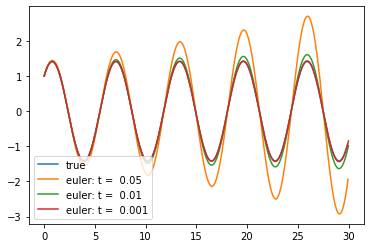

In [330]:
# Set the starting values
k = 1
x = 1
v = 1
m = 1
w0 = np.sqrt(k/m)


# Real simple harmonic oscillator
t = np.arange(0, 30, 0.1)
A = x
B = v/w0
x_t = A * np.cos(w0 * t) + B * np.sin(w0 * t) 

plt.figure(0)
plt.plot(t, x_t, label = "true")

# Euler approximated har. oscillator
t_steps = [0.05, 0.01, 0.001]

for dt in t_steps:
    
    array = np.zeros(shape=(int(30/dt), 2))
    array[0,0] = x
    array[0,1] = v

    for n in np.arange(0,int(30/dt)-1):
        array[n+1,:] = array[n,:] + dt * simple_harmonic_oscillator(array[n,:], w0)
        
    plt.plot(np.arange(0, 30, dt), array[:, 0], label = f"euler: t = {dt}")
    
plt.legend()
plt.show()

### Lotka-Volterra model (3 points)

Simulate the Lotka-Volterra model using the Euler approximation. Visualize the population dynamics for predator and prey.

In [352]:
def lotka_volterra(X, a, b, delta, gamma):
    """
    X: state vector [x, y, x_dot, y_dot]
    
    x^ = a*x - b * x * y
    y^ = delta * x * y - gamma * y
    """
    
    return np.array([ 
        a * X[0] - b * X[0] * X[1], 
        delta * X[0] * X[1] - gamma * X[1]
    ])

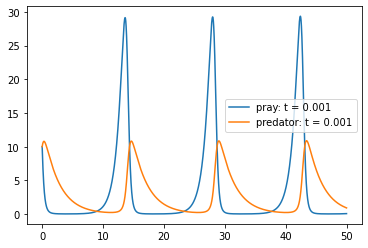

In [359]:
x = 10
y = 10
a = 1.1
b = 0.4
delta = 0.1
gamma = 0.4

t_steps = [0.001]

for dt in t_steps:
    
    array = np.zeros(shape=(int(50/dt), 2))
    array[0,0] = x
    array[0,1] = y

    for n in np.arange(0,int(50/dt)-1):
        array[n+1,:] = array[n,:] + dt * lotka_volterra(array[n,:], a, b, delta, gamma)
        
    plt.plot(np.arange(0, 50, dt), array[:, 0], label = f"pray: t = {dt}")
    plt.plot(np.arange(0, 50, dt), array[:, 1], label = f"predator: t = {dt}")
    
plt.legend()
plt.show()

### 2D Brownian motion (3 points)

Create a 2D Brownian motion simulation using the Euler-Maruyama approximation.


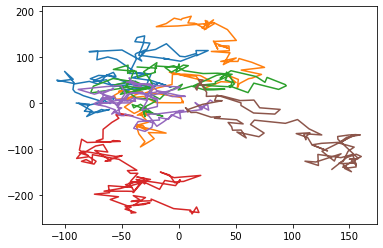

In [418]:
paths = np.zeros(shape=(6,100))


t = 11

plt.figure(2)

for i in range(0, 6):
    
    path = np.zeros(shape=(100,2))
    x = rng.randrange(-5*t, 5*t)
    y = rng.randrange(-5*t, 5*t)

    for i in range(0, 100):
        x = np.random.normal(x, t)
        y = np.random.normal(y, t)
        path[i, 0] = x
        path[i, 1] = y
    
    plt.plot(path[:,0], path[:,1])